In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import subprocess
import time

def collect_info(program, filename, times_list, coverages_list):
    
    with open(f'./entradas/{filename}','r') as input_file, open(f'./solucoes/{filename.replace("entrada", "solucao")}','a') as solution_file:    
        for line in input_file:
            solution_file.write(line)


    with open(f'./entradas/{filename}','r') as input_file, open(f'./solucoes/{filename.replace("entrada", "solucao")}','a') as solution_file, open(f'./saidas/{filename.replace("entrada", "saida")}','a') as output_file:

        start = time.perf_counter()
        proc = subprocess.run([f'./{program}'], input=input_file.read(), text=True, capture_output=True)
        end = time.perf_counter()
        times_list.append(end-start)

        solution_file.write(f'\n{proc.stdout}')
        output_file.write(proc.stdout)
    
    with open(f'./solucoes/{filename.replace("entrada", "solucao")}','r') as solution_file:
        proc = subprocess.run([f'./verify'], input=solution_file.read(), text=True, capture_output=True)
        coverages_list.append(float(proc.stdout))

In [5]:
sizes = [250, 500, 1000]
filenames = []
coverages = []
times = []

for n in sizes:
    for i in range(1,21):
        filenames.append(f'entrada-{n}-{i}.txt')

for filename in filenames:
    collect_info(program="busca-local", filename=filename, times_list=times, coverages_list=coverages)
    

In [6]:
times = [i * 1000 for i in times]
print(times) #em ms

[24.09733785316348, 19.579430110752583, 20.221755374222994, 20.148369949311018, 26.045648846775293, 21.33465511724353, 19.146902952343225, 24.161679204553366, 86.04588080197573, 23.864792194217443, 22.195509634912014, 20.460326690226793, 26.676675770431757, 77.27584289386868, 22.904342971742153, 79.72355093806982, 19.062376115471125, 19.611520692706108, 23.03251624107361, 84.83409322798252, 135.35790285095572, 126.66384829208255, 167.3850561492145, 149.24343721941113, 151.24686807394028, 119.74125495180488, 124.78900281712413, 159.37969228252769, 159.46369105949998, 146.03185513988137, 155.23508936166763, 123.91444388777018, 136.91401295363903, 118.52579284459352, 136.94090908393264, 139.6377612836659, 131.734071765095, 133.08176072314382, 124.81334712356329, 146.54546417295933, 196.26650540158153, 198.3370720408857, 202.31125224381685, 217.4885137937963, 198.84597696363926, 201.04451710358262, 187.95019388198853, 215.93635203316808, 195.80339919775724, 172.78291191905737, 171.37011978

In [7]:
series = []

for n in sizes:
    for i in range(1,21):
        series.append(n)
        

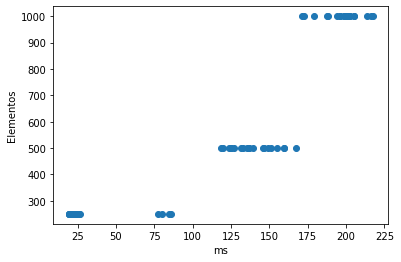

In [8]:
plt.scatter(times, series)
plt.xlabel("ms")
plt.ylabel("Elementos")
plt.show()

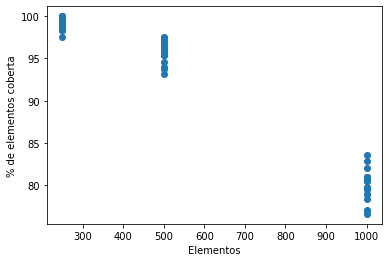

In [9]:
plt.scatter(series, coverages)
plt.xlabel("Elementos")
plt.ylabel("% de elementos coberta")
plt.show()